Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict?
- [ ] Is your problem regression or classification?
- [ ] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [ ] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [ ] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve

DM = Dispersion Measure

SNR = Signal to Noise Ratio

In [2]:
ps = pd.read_csv('C:\data\pulsarstars.csv')
#for colab
#ps = pd.read_csv('https://github.com/DoctorDroid/Build2/blob/master/pulsarstars.csv')
ps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                17898 non-null  float64
 1    Standard deviation of the integrated profile  17898 non-null  float64
 2    Excess kurtosis of the integrated profile     17898 non-null  float64
 3    Skewness of the integrated profile            17898 non-null  float64
 4    Mean of the DM-SNR curve                      17898 non-null  float64
 5    Standard deviation of the DM-SNR curve        17898 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7    Skewness of the DM-SNR curve                  17898 non-null  float64
 8   target_class                                   17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


## Clean. No null values and all of the data is numeric


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

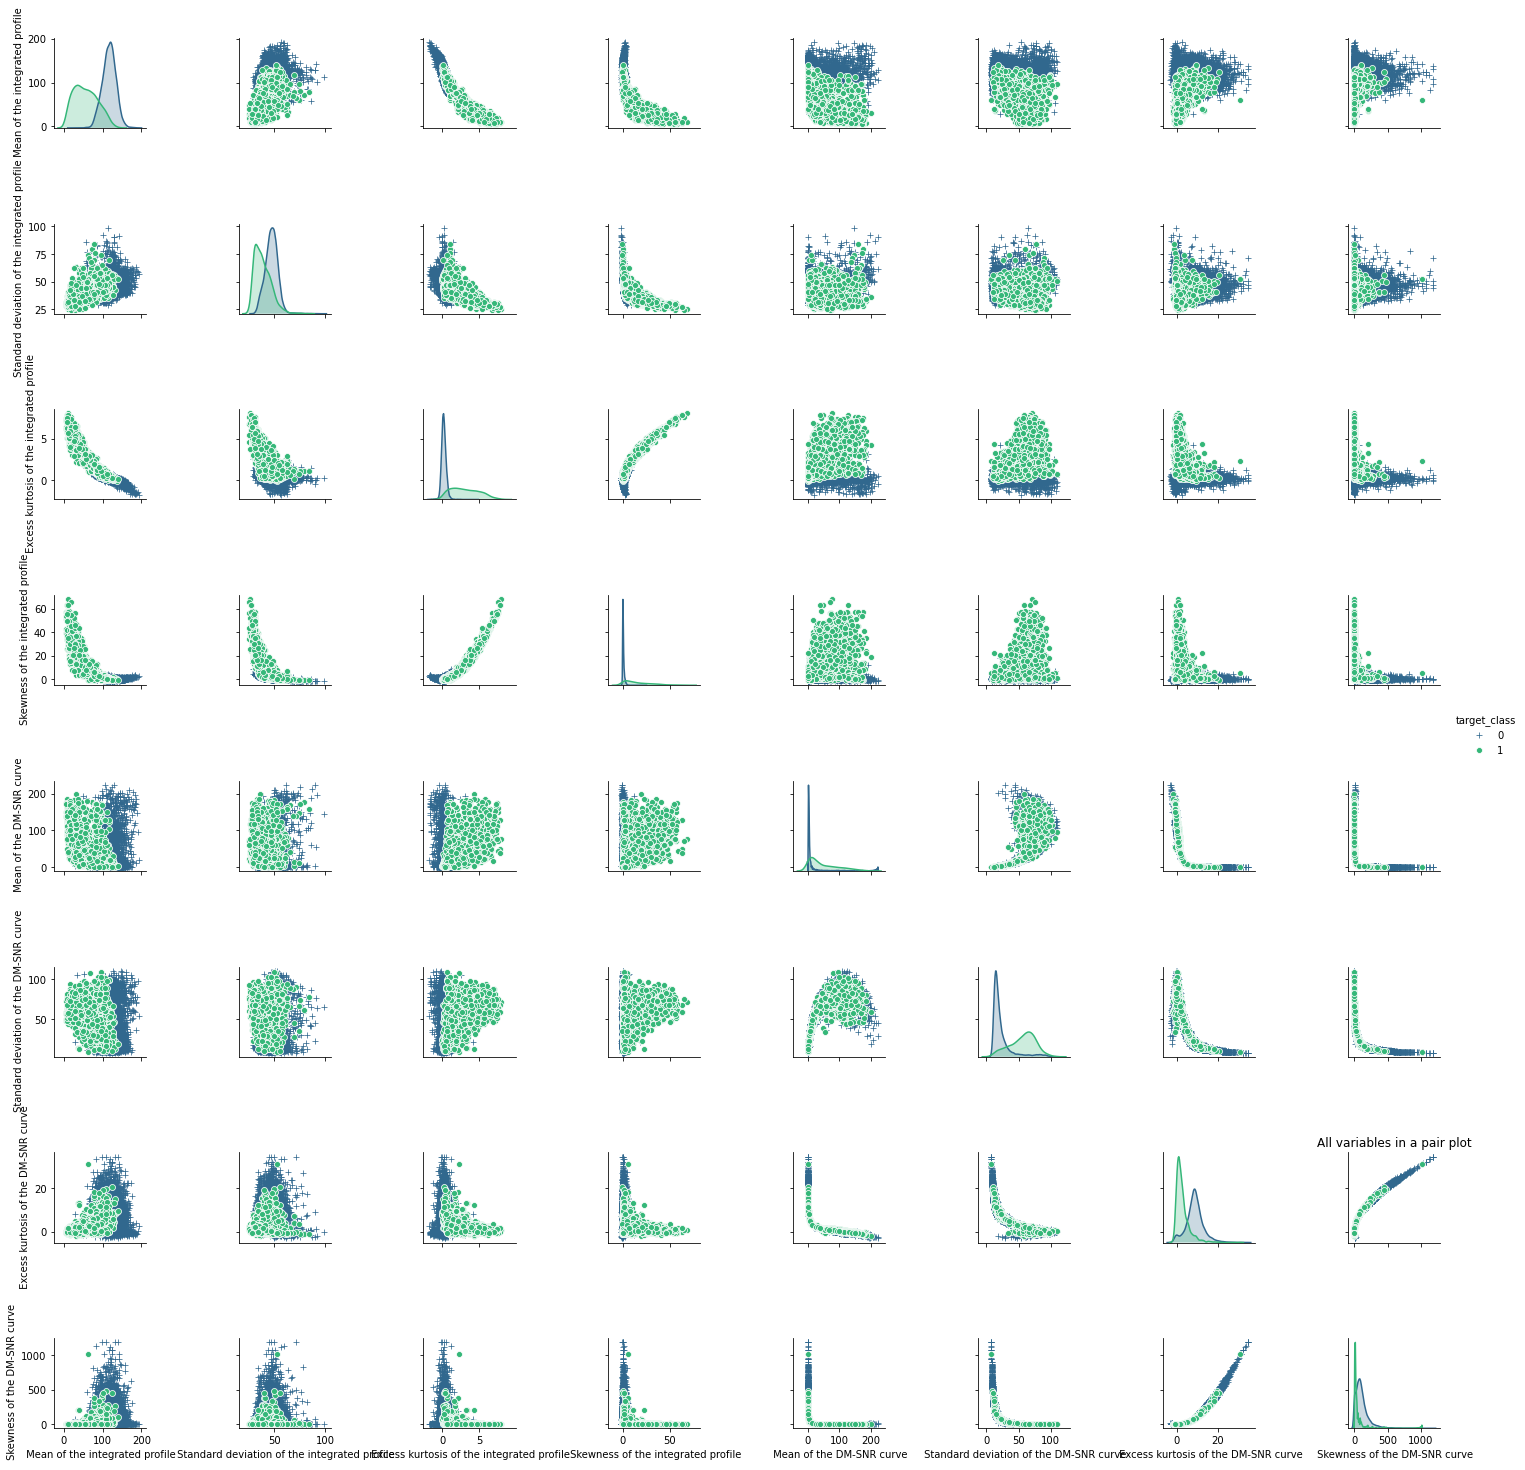

In [3]:
g1 = sns.pairplot(ps, hue = 'target_class',markers=["+", "o"],palette= 'viridis')
plt.title("All variables in a pair plot")
plt.tight_layout

### On to splitting the data into train/validate/and test sets

In [4]:
# Setting aside a sample of the data for testing.
# this portion will not be "known" during the model adjustment process.
train, test = train_test_split(ps,test_size=0.10, 
                              stratify=ps['target_class'],
                               random_state= 17)

In [5]:
# Separating the remaining data into training and validation sets.
#this allows me to tweak my model to perform at it's best before testing it on unknown data. 
train, val = train_test_split(train,test_size=0.20, 
                              stratify=train['target_class'],
                               random_state= 17)

In [6]:
train.shape,val.shape,test.shape

((12886, 9), (3222, 9), (1790, 9))

In [7]:
# To prove the similar distribuition over training, validation, and testing sets.
# This is accomplished by using the 'stratify' argument while splitting the data.
train['target_class'].value_counts(normalize=True),val['target_class'].value_counts(normalize=True),test['target_class'].value_counts(normalize=True)


(0    0.908428
 1    0.091572
 Name: target_class, dtype: float64,
 0    0.908442
 1    0.091558
 Name: target_class, dtype: float64,
 0    0.90838
 1    0.09162
 Name: target_class, dtype: float64)

## Solid.
###  If I just built a model that always reporterd '0' (non-pulsar star) it would be correct about 90.8% of the time (our baseline accuracy). This may be dificult to improve upon, but I enjoy a challenge!
### Now to separate our data into X feature matrices and y target vectors.

In [8]:
target = 'target_class'
features = ps.columns.drop(target)

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

## Now to initialize my model. I am going with a Random Forrest Classifier. This type of model tends to out perform the rest of the models In my arsenal on classification tasks. 

In [15]:
model = RandomForestClassifier(random_state=13,     # Random seed to select the same  
                               n_jobs=-1,           # max jobs my processing power can handle at once

                               n_estimators= 91,    # the number of decision trees the model may 
                                                    # create before taking a consensus 
                                
                               max_depth= 22)       # the max number of decisions to determine each vote

# Fit on train, score on val
model.fit(X_train, y_train)
print('Validation Accuracy', model.score(X_val, y_val))

Validation Accuracy 0.9798261949099938


### After a few iterations, tweaking the hyperperameters lower and higher, I found the sweet spot of this models performance capabilities. Nearly 98% accurate is a better than expected result.
## Still I'll try for better before testing.
(I'd love to see another season of 'Lost in Space' , but I wouldn't want to be responsible for the reality-show version's release)
## More metrics before adding any new hyperparameters to my model. 


# Confusion Matrix

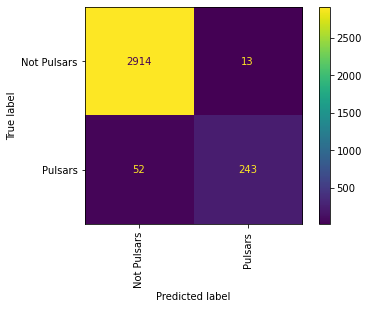

In [16]:
plot_confusion_matrix(model, X_val, y_val, values_format='.0f', xticks_rotation='vertical',display_labels=('Not Pulsars', 'Pulsars'))

# Probabilities as a Distibution plot

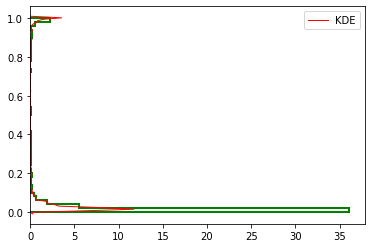

In [35]:
y_pred_proba = model.predict_proba(X_val)[:, 1] # This slice notation simply says'Take all rows but
                                                   # only the second column of the predict_proba method
sns.distplot(y_pred_proba,
             vertical = True,
             kde_kws={"color": "r", "lw": 1, "label": "KDE"},
             hist_kws={"histtype": "step", "linewidth": 2,"alpha": 1, "color": "g"}
            ) #plotted as a distribution plot it looks like this

# ROC curve

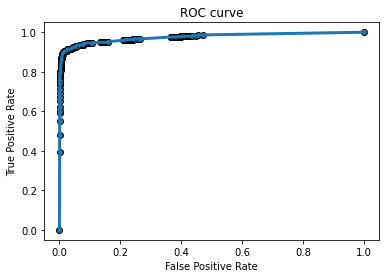

In [36]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
plt.scatter(fpr, tpr, edgecolors='k',lw= 1)
plt.plot(fpr,tpr, lw=3)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

In [37]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val, y_pred_proba)

0.9754350205277573

References: 

Selection of radio pulsar candidates using artificial neural networks - Eatough, R.P. et al. Mon.Not.Roy.Astron.Soc. 407 (2010) 2443 arXiv:1005.5068 [astro-ph.IM]
http://old.inspirehep.net/record/856422/plots?ln=en

# Notes
While the term 'pulsar' is a combination of the words 'pulse' and 'star, pulsars aren't pulsating and it could be argued that they aren't really even stars at all. 

Thier emissions are continuous but beamed, so from any one perspective, a pulse of radiation is observered each time the beeam sweeps through the observers point of view. These sweeps are extremely regular in interval since they occur with each rotation of the pulsar.

Think of the interstellar medium (ISM) as the 'space between' stars or even galaxies, the gases or empty space that exist not apparent to the naked eye or even optical telescopes. This space does have, at very least, electrons and other sub atomic particles detectable by our more powerful telescopes that work outside the optical spectrum. If you are to envision the ISM as an ocean rather than a void, it becomes easier to understand how pulsar stars are detected. The Dispersion Measure, refered to as DM in the data used in this article. 